**world coordinate system tutorial**<br>
@author: Rui Zhu<br>
@creation time: 2023-04-25

## [使用WCS进行像素坐标和天球坐标的转换](https://docs.astropy.org/en/stable/wcs/index.html#a-simple-example)

In [4]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename

# 获取测试图像的路径
fn = get_pkg_data_filename('data/j94f05bgq_flt.fits', package='astropy.wcs.tests')
fn

'/Users/rui/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/wcs/tests/data/j94f05bgq_flt.fits'

* 像素坐标转天球坐标

In [14]:
hdul = fits.open(fn)
w = WCS(hdul[1].header)
sky = w.pixel_to_world(30, 40)
print(sky)

<SkyCoord (ICRS): (ra, dec) in deg
    (5.52844243, -72.05207809)>


* 天球坐标转像素坐标

In [15]:
position = w.world_to_pixel(sky)
print(position)

(array(30.00000215), array(39.99999996))


In [17]:
w

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 5.63056810618  -72.05457184278998  
CRPIX : 2048.0  1024.0  
CD1_1 CD1_2  : 1.29056256197165e-05  5.95309123310338e-06  
CD2_1 CD2_2  : 5.0220581265601e-06  -1.2644774105568e-05  
NAXIS : 1  1

## [绘制RA, DEC的图](https://docs.astropy.org/en/stable/wcs/wcstools.html)

In [19]:
import warnings
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs import FITSFixedWarning
from astropy.utils.data import get_pkg_data_filename

fname = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
fname

'/Users/rui/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents'

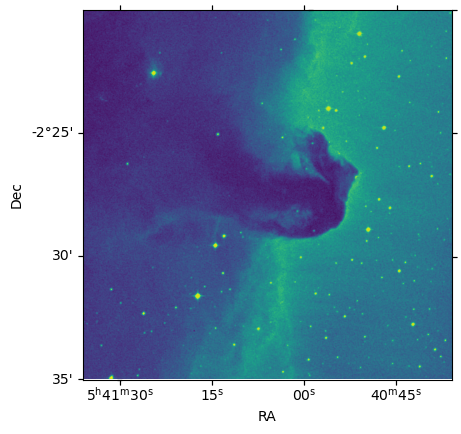

In [35]:
hdu = fits.open(fname)[0]
with warnings.catch_warnings():
    # 忽略一个warning
    warnings.filterwarnings('ignore', message="'datfix' made the change", 
                            category=FITSFixedWarning)
    wcs = WCS(hdu.header)

fig = plt.figure()
fig.add_subplot(projection=wcs)
plt.imshow(hdu.data, origin='lower')
plt.xlabel("RA")
plt.ylabel("Dec")